# "Linear Regression from scratch in Julia"
> "Today, i will show you how to implement `Linear Regression` from scratch in `Julia`. This blog is written using *`Julia=1.7.2`* and *`Plots=1.29.0`*"

- toc: true
- branch: master
- badges: true
- hide_deepnote_badge: true
- hide_binder_badge: true
- comments: true
- categories: [julia, Linear Regression]

## Getting Started with Julia in Colab/Jupyter by [Aurélien Geron](https://twitter.com/aureliengeron)

> This Getting started/ setup instructions is taken directly from [Julia_for_Pythonistas](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_for_Pythonistas.ipynb) blog post written by [Aurélien Geron @aureliengeron](https://twitter.com/aureliengeron). Many thanks to him for putting such an elegant comparision of `python - julia`. I highly recommend this blog if you are coming from `python` background. It bridges the gap from `python -> julia` transition....!!

You can either run this notebook in Google Colab by pressing on `open in colab` button at the top of this post, or if you have Jupyter already on your own machine, you can download this notebook and run locally

### Running on Google Colab
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).
2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia (the Jupyter kernel for Julia) and other packages. You can update `JULIA_VERSION` and the other parameters, if you know what you're doing. Installation takes 2-3 minutes.
3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the _Checking the Installation_ section.

* _Note_: If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2 and 3.

In [ ]:
#collapse
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.7.2"
JULIA_PACKAGES="IJulia Plots"
JULIA_NUM_THREADS=4
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

### Running This Notebook Locally

If you prefer to run this notebook on your machine instead of Google Colab:

* Download this notebook (File > Download .ipynb)
* Install [Julia](https://julialang.org/downloads/)
* Run the following command in a terminal to install `IJulia` (the Jupyter kernel for Julia), and a few packages we will use:
```bash
julia -e 'using Pkg
            pkg"add IJulia; precompile;"
            pkg"add Plots; precompile;"'
```

* Next, go to the directory containing this notebook:

    ```julia
cd /path/to/notebook/directory
```

* Start Jupyter Notebook:

    ```bash
julia -e 'using IJulia; IJulia.notebook()'
```

    Or replace `notebook()` with `jupyterlab()` if you prefer JupyterLab.

    If you do not already have [Jupyter](https://jupyter.org/install) installed, IJulia will propose to install it. If you agree, it will automatically install a private Miniconda (just for Julia), and install Jupyter and Python inside it.


* Refer [Pkg Documentaion](https://docs.julialang.org/en/v1/stdlib/Pkg/) for additional info.
* Lastly, open this notebook and skip directly to the next section.

## Problem statement

Let's first define our problem statement as follows...
> Let's say we want to find the velocity of a car at some instant of time `t` represented by `V(t)` given, initial velocity `V₀ = 3 m/s` and an accelaration `acc = 10 m/s²`

## Generate Dataset

In [1]:
# function for velocity at time t for acc = 10 and V₀ = 3
acc = 10.5
V₀ = 0.5
velocity(t, acc, V₀) = acc*t + V₀

velocity (generic function with 1 method)

In [2]:
# lets say t is from 0 - 25s (with 1s interval)
t = collect(0:1:25)

# Calculate V(t) for all t
Vₜ = velocity.(t, acc, V₀); # `.` is used to broadcast function to apply on each value of input

In [38]:
#hide_input
# print Dataset
using Printf: @printf
@printf "%5s => %5s\n" "t" "V(t)"
println("-----------------------")
for (a, b) in zip(t, Vₜ)
    @printf "%5d => %5d\n" a b
end

    t =>  V(t)
-----------------------
    0 =>     0
    1 =>    11
    2 =>    22
    3 =>    32
    4 =>    42
    5 =>    53
    6 =>    64
    7 =>    74
    8 =>    84
    9 =>    95
   10 =>   106
   11 =>   116
   12 =>   126
   13 =>   137
   14 =>   148
   15 =>   158
   16 =>   168
   17 =>   179
   18 =>   190
   19 =>   200
   20 =>   210
   21 =>   221
   22 =>   232
   23 =>   242
   24 =>   252
   25 =>   263


## Plot Dataset

In [4]:
# import plots package
using Plots
# default backend used by Plots.jl package
gr() 

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


Plots.GRBackend()

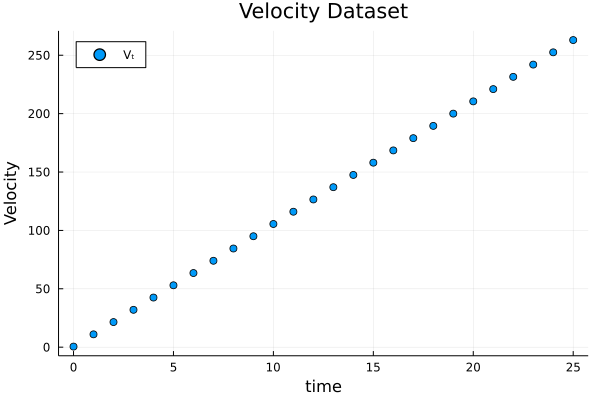

In [17]:
scatter(t, Vₜ, label = "Vₜ")
scatter!(title = "Velocity Dataset", xlabel="time", ylabel="Velocity", legend=:topleft)

Now we change the names of our Dataset variables so that it is consistent with Machine Learning jargon.

i.e,

`y == Vₜ` (output variable)

`X == t` (input variable)

And, now our goal is train a Linear Regression model to form an equation `y = 10x + 3` bcz, in our case `a == 10` and `V₀ == 3`.

In [9]:
X = reshape(t, 1, :) # convert to (no. of features, no. of samples)
y = Vₜ;
foreach(println ∘ summary, (X, y))

1×26 Matrix{Int64}
26-element Vector{Float64}


## Creating Linear Regression Model

In `Linear Regression` we would fit weights w.r.t. each input feature, optionally considering bias.
For our problem we have only one input feature  

`General LR model(X) = W₁X₁ + W₂X₂  + W₃X₃....... + b`

Since, we only have one feature which is `t`, so we would want to define one weight value, `W` with bias `b` which gives us with following model -->

`model(x) = Wx + b`

At given time `x` we should predict output using `W` and `b` (which itself we will going to find out based on `Learning`


In [10]:
# create model as a simple equation 
model(X, W, b) = W*X .+ b

model (generic function with 1 method)

First, before training we need to initialize our `parameters` (both `W` and `b`) to some random values.

Generally we would intialize weights randomly and bias to 0.
Let's do the same here

In [11]:
using Random

# Seeding
rng = Random.default_rng()
Random.seed!(rng, 1327)

TaskLocalRNG()

In [12]:
W = rand(Float32, 1);
b = zeros(Float32, 1);
W, b

(Float32[0.6099193], Float32[0.0])

In [13]:
# sample Inference for t = 3
x = 3
y_true = velocity(x, acc, V₀)
y_pred = model(x, W, b)
y_true, y_pred

(32.0, Float32[1.8297579])

> As you can see there is a huge gap w.r.t output predicted vs real using random parameters, now it is time to tune parameters such that predicted values become close to real targets.

## Training Model

For training model we need 3 components at least.
1. Data (X, y) 
2. Loss function (To tune parameters based on how good/bad our model performance is)
3. Optimization strategy (we use Gradient descent -> simple yet effective optimization procedure that is used widely)

As we already prepared dataset, it's time to write loss function.

A simple loss function for this regression problem (continuous output) is `Mean Squared error` for short `mse`.

In [14]:
function loss(ŷ, y)
    m = length(y)  # no. of samples
    return sum(abs2, (ŷ .- y)) / 2m
end

loss (generic function with 1 method)

In [15]:
# loss before training
ŷ = model(X, W, b) |> vec # vec is used to convert [1 * y] output matrix to vector [y]
loss(ŷ, y) 

10454.643213301923

### Predictions vs targets plot before training

In [18]:
function plot_preds_vs_targs(ŷ, y)
    plot(ŷ, label = "Vₜ preds", linewidth=4)
    scatter!(y, label = "Vₜ actual")
    scatter!(title = "Predictions vs Targets", xlabel="time", ylabel="Velocity", legend=:topleft)
end

plot_preds_vs_targs (generic function with 1 method)

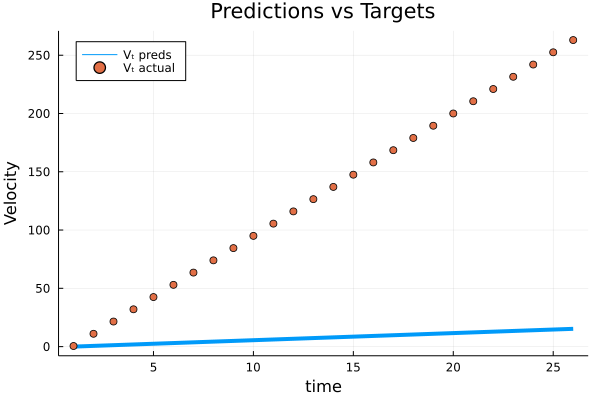

In [19]:
plot_preds_vs_targs(ŷ, y)

Now, it is time for tackling Gradient descent step by step.
- Our Goal is to descrease loss as much as possible by tuning correct values for paramaters of the model. 
1. This can be done by taking gradients of the loss function w.r.t. each parameters (W, b in our case). This tells us in which direction we should update the params to increase the loss.
2. We Update those params in a such a way that loss should decrease in next step. So we always negate the gradients before updating the params.
3. Updating is done by subtracting each params independently, by its gradient taken w.r.t. loss. (often updates are multiplied with some fraction (called `Learning rate`)
4. Above 3 steps are repeated given number of times (we call it `epochs`) or we can stop training in the middle when we are satisfied with the loss value.

In [20]:
function gradient(X, y, ŷ)
    m = length(y); # number of samples

    W⁻ = sum((ŷ .- y) .* X[1, :]) / m
    b⁻ = sum(ŷ .- y) / m
    
    return W⁻, b⁻
end

gradient (generic function with 1 method)

> I'm skipping for braveity on how i came up with Gradient equations above. 

> We get those equations when we calculate partial derivatives => `dL\dW` and `dL\db`.

> For nice reference you can watch [this playlist by 3Blue1Brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) :)

In [21]:
function update!(W, b, W⁻, b⁻; lr)
    # `!` is postfixed to func name as a convention for inplace update of any of the arguments passed to it
    # here, we update `W, b` inplace 
    W[1] -= lr * W⁻
    b[1] -= lr * b⁻
    
    return Nothing
end

update! (generic function with 1 method)

### Trainer -> for Training model 

Now, we will combine everything => `data`, `params`, `model`, `loss`, `gradient` and `update` into a **`trainer`**.

In [22]:
function trainer!(X, y, W, b, model, loss, gradient, update!; epochs, lr)
    W_hist = zeros(Float32, epochs)
    b_hist = zeros(Float32, epochs)
    l_hist = zeros(Float32, epochs)
    
    for i in 1:epochs
        # store params history
        W_hist[i] = W[1]
        b_hist[i] = b[1]
        # calc preds and convert to a vector
        ŷ = model(X, W, b) |> vec
        # calc loss and store it in history
        l_hist[i] = loss(ŷ, y)
        # print loss every 100 epochs
        (i % 100 != 0) || @printf "@Epoch : %4d => loss = %5.4f\n" i l_hist[i]
        # calc gradients
        W⁻, b⁻ = gradient(X, y, ŷ)
        # update weights
        update!(W, b, W⁻, b⁻, lr=lr)
    end
    
    return l_hist, W_hist, b_hist
end

trainer! (generic function with 1 method)

In [23]:
# set some Hyper Parameters (Learning rate and no. of epochs) for training the model
lr = 1f-4
epochs = 2000;

In [24]:
loss_hist, W_hist, b_hist = trainer!(X, y, W, b, model, loss, gradient, update!; epochs=epochs, lr=lr);

@Epoch :  100 => loss = 146.5059
@Epoch :  200 => loss = 1.9673
@Epoch :  300 => loss = 0.0273
@Epoch :  400 => loss = 0.0012
@Epoch :  500 => loss = 0.0009
@Epoch :  600 => loss = 0.0009
@Epoch :  700 => loss = 0.0009
@Epoch :  800 => loss = 0.0009
@Epoch :  900 => loss = 0.0009
@Epoch : 1000 => loss = 0.0008
@Epoch : 1100 => loss = 0.0008
@Epoch : 1200 => loss = 0.0008
@Epoch : 1300 => loss = 0.0008
@Epoch : 1400 => loss = 0.0008
@Epoch : 1500 => loss = 0.0008
@Epoch : 1600 => loss = 0.0008
@Epoch : 1700 => loss = 0.0008
@Epoch : 1800 => loss = 0.0008
@Epoch : 1900 => loss = 0.0008
@Epoch : 2000 => loss = 0.0008


### Predictions Animation

In [25]:
#collapse
function animate_preds(X, y, W_hist, b_hist)
    anim = Animation()

    for i in 1:length(W_hist)
        scatter(y, label = "Vₜ actual")
        scatter!(title = "Predictions vs Targets (Animation)", xlabel="time", ylabel="Velocity", legend=:topleft)
        ŷ = model(X, W_hist[i], b_hist[i]) |> vec
        plot!(ŷ, label = "Vₜ preds")
        frame(anim)
    end  

    display(gif(anim, "preds_vs_targs.gif", fps=5))
end

animate_preds (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /mnt/d/karthikdk/julia_workspace/LinReg_Blog/preds_vs_targs.gif
└ @ Plots /home/karthikdk/.julia/packages/Plots/1KWPG/src/animation.jl:114


Plots.AnimatedGif("/mnt/d/karthikdk/julia_workspace/LinReg_Blog/preds_vs_targs.gif")
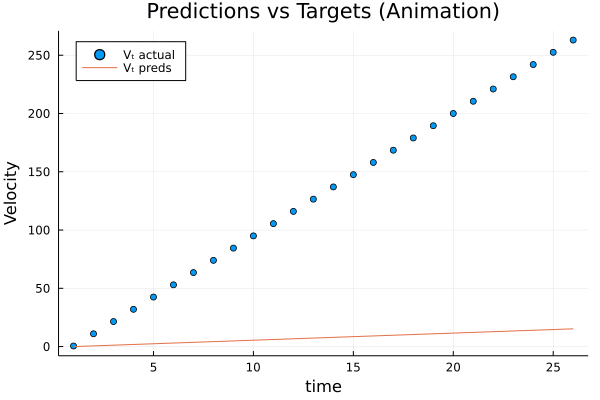

In [26]:
# predictions animation view 
animate_preds(X, y, W_hist, b_hist)

> In this Animation, you can see how tuning of parameters with correct values is helping the model to predict values as close to targets as possible...

In [29]:
#collapse
function static_preds(X, y, W_hist, b_hist)
    plt = scatter(y, label = "Vₜ actual")
    scatter!(title = "Predictions vs Targets (Static)", xlabel="time", ylabel="Velocity", legend=:topleft)
    
    for i in 1:length(W_hist)
        # display targs every 10 epochs
        if (i % 10 == 0)
            ŷ = model(X, W_hist[i], b_hist[i]) |> vec
            plot!(ŷ, label = false)
        end
    end
    display(plt)
end

static_preds (generic function with 1 method)

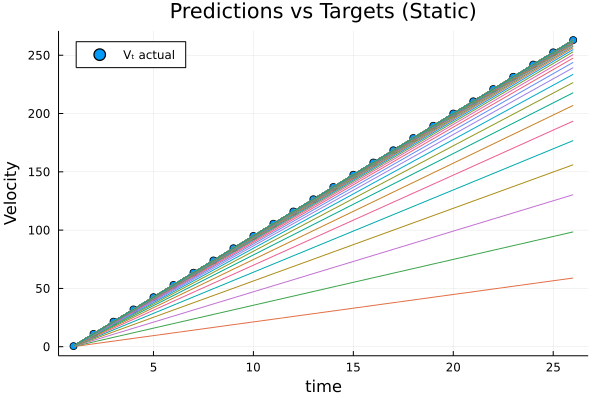

In [30]:
# predictions static view
static_preds(X, y, W_hist, b_hist)

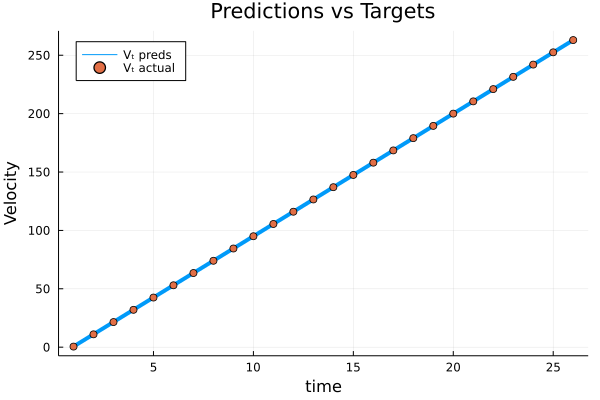

In [31]:
# predictions vs targets after training
plot_preds_vs_targs(model(X, W_hist[end], b_hist[end])[:], y)

### Plot (Loss, Weight, Bias) vs (epochs)

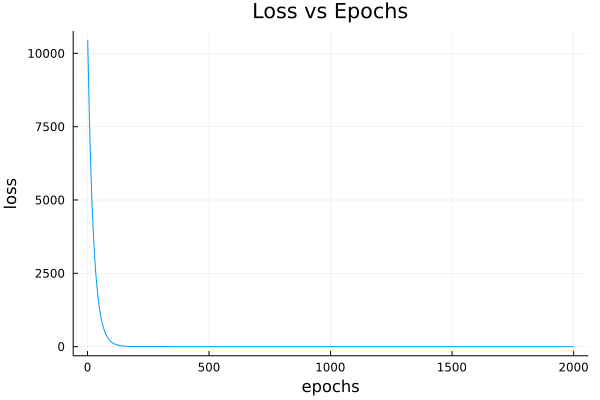

In [32]:
plot(loss_hist, label=false, xlabel="epochs", ylabel="loss", title="Loss vs Epochs")

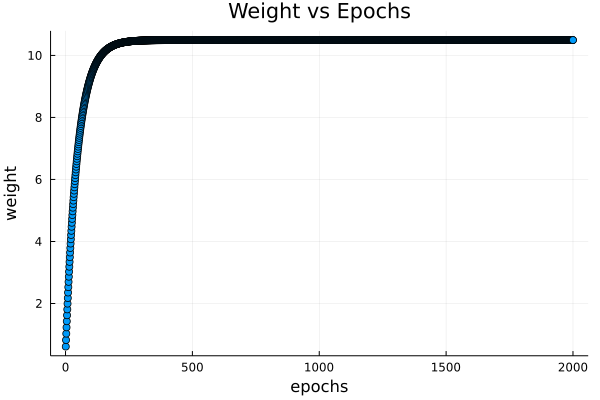

In [33]:
scatter(W_hist, label=false, xlabel="epochs", ylabel="weight", title="Weight vs Epochs")

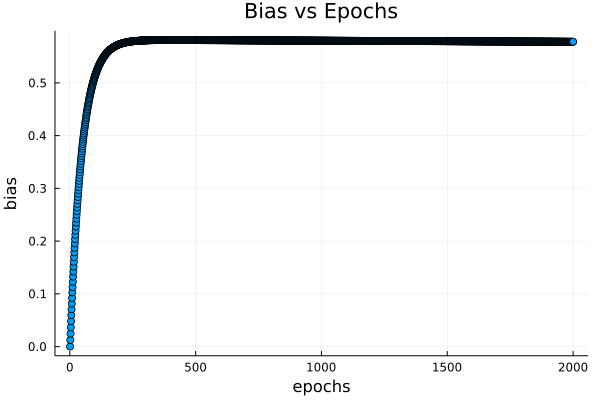

In [34]:
scatter(b_hist, label=false, xlabel="epochs", ylabel="bias", title="Bias vs Epochs")

> As we can see, with increase in epochs, `params` and `loss` reaches it's optimal value over time (increase in epochs)... 

### Surface Plots 

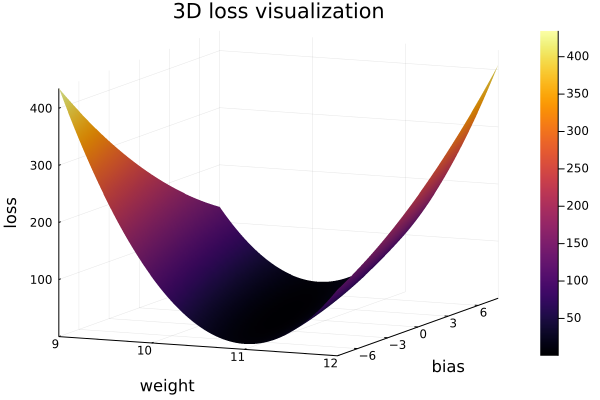

In [35]:
#collapse
# Surface plot
loss_fn(W, b) = loss(model(X, W, b) |> vec, y)

# W_values = collect(Float32, LinRange(5.0, 15.0, 100))
# b_values = collect(Float32, LinRange(-2.0, 2.0, 100))
W_values = collect(Float32, LinRange(9.0, 12.0, 100))
b_values = collect(Float32, LinRange(-8.0, 8.0, 100))
surface(W_values, b_values, loss_fn)
surface!(title = "3D loss visualization", xlabel="weight", ylabel="bias", zlabel="loss")
# plot!(W, b, Float32(loss_fn(W, b)), marker=:star, ms=5, label="optimal loss")

> Here, we can verify that, with correct values for `Weight` and `bias`, we get to the lowest `loss`....

### Contour Plots 

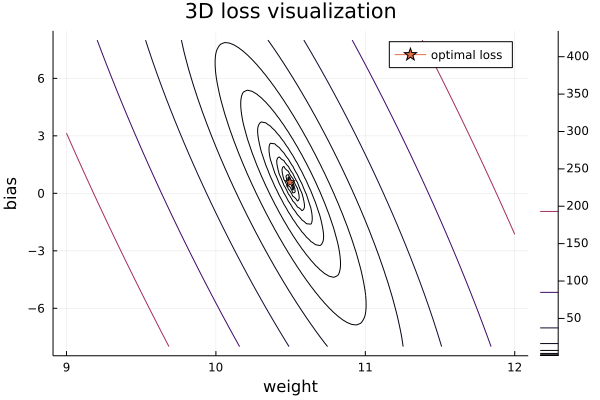

In [36]:
#collapse
# Contour Plot in log-space
logspace(a, b, n) = 10 .^ range(a, stop=b, length=n)

W_values = collect(Float32, LinRange(9.0, 12.0, 100))
b_values = collect(Float32, LinRange(-8.0, 8.0, 100))

# Plot loss_hist as 15 contours spaced logarithmically between 0.01 and 100
contour(W_values, b_values, loss_fn, levels=logspace(-2, 3, 15))
contour!(title = "3D loss visualization", xlabel="weight", ylabel="bias")
plot!(W, b, marker=:star, ms=5, label="optimal loss")

> This `contour plot` will give us an idea about how loss varies with different combinations of `Weight` and `bias` ....

**After training the model, we get following values for `acc` and `V₀` compared to actual values that we used to generate Dataset. It's pretty close.**

In [37]:
#hide_input
@printf "@Actual    values : acc = %5.4f & V₀ = %5.4f\n" acc V₀
@printf "@Predicted values : acc = %5.4f & V₀ = %5.4f\n" W[1] b[1]

@Actual    values : acc = 10.5000 & V₀ = 0.5000
@Predicted values : acc = 10.4954 & V₀ = 0.5780


> **Finally.... we were able to get the optimal values as close to original values as possible using Machine Learning !!!**

> **Let me know if you have any queries/suggestions in the comments.**

## References :

- [Machine Learning by Coursera](https://www.coursera.org/learn/machine-learning)
- [Julia Manual](https://docs.julialang.org/en/v1/)
- [Neural Network playlist by 3Blue1Brown](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
- [Julia_for_Pythonistas](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_for_Pythonistas.ipynb) blog post written by [Aurélien Geron @aureliengeron](https://twitter.com/aureliengeron)